# League Of Legends EUW challanger game stats
## Penjelasan Menggukanan Crips-DM

### 1. Business Understanding
Player LoL memiliki statistik yang didapat setiap permainan , player mungkin ingin mengetahui kda yang dimiliki pada setiap permainan, tujuan analisis ini adalah untuk meng estimasi kda dengan menggunakan data yang didapat.
### 2. Data understanding
Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data.
Dari pengumpulan data yang telah didapat, terdapat 16 kolom, yang bertype boolean(1), float(13), int (2) Berikut atribut-atribut nya :

 >0   Unnamed: 0.1 int64 

 >1   Unnamed: 0    int64  

 >2   kills(jumlah membunuh player lain) float64

 >3   deaths(jumlah dibunuh)             float64

 >4   assists(jumlah membantu membunuh)  float64

 >5   killParticipation(Partisipasi membunuh)   float64

 >6   kda(Rasio kill/death/assists)                   float64

 >7   goldPerMinute(gold yang didapat permenit)         float64

 >8   totalMinionsKilled(jumlah minion yang dibunuh)  float64

 >9   gold(gold yang didapat)                  float64

 >10  totalDamageDealt(jumlah damage yang diberikan)      float64

 >11  visionScore(score vision)            float64

 >12  visionScorePerMinute(score vision per menit)    float64
 
 >13  skillshotsDodged(skills terhindar)         float64
 
 >14  skillshotsHit(skills terkena)           float64
 
 >15  win(menang)                  bool   




### 3. Data preparation
Tahap ini secara garis besar dipakai untuk memperbaiki masalah dalam data, sangat jelas bahwa dalam tahap ini membutuhkan pemikiran yang cukup matang dan usaha yang cukup tinggi untuk memastikan data tepat untuk algoritma yang digunakan dan proses data dapat menuju model berkualitas yang berguna.
Terdapat 5624 data statistik player lol challanger region EUW dan data yang digunakan dalam proses analasis ini adalah:
 >kills(jumlah membunuh player lain) float64

 >deaths(jumlah dibunuh)             float64

 >assists(jumlah membantu membunuh)  float64
 
 >killParticipation(Partisipasi membunuh)   float64

   

Sedangkan kda sebagai target


### 4. MODELLING
Pada tahap ini dilakukan metode statistika dan Machine Learning untuk penentuan terhadap teknik data mining, alat bantu data mining, dan algoritma data mining yang akan diterapkan. Jika diperlukan penyesuaian data terhadap teknik data mining tertentu, maka dapat kembali ke tahap data preparation.

Model yang digunakan untuk menganalisis data statistik ini yaitu regresi linier.

### 5.EVALUATION
Setelah di dapatkan beberapa model, sehingga dilakukan penilaian terkait kualitas dan efektisitas-nya. Kemudian lakukan interpretasi terhadap hasil dari data mining yang dihasilkan dalam proses pemodelan pada tahap sebelumnya, dengan tujuan agar model yang ditentukan dapat sesuai dengan tujuan yang ingin dicapai dalam tahap pertama atau tahap business understanding.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [21]:
df = pd.read_csv('euw_challanger.csv')

# Deskripsi Dataset

In [22]:
df.head()

,Unnamed: 0.1,Unnamed: 0,kills,deaths,assists,killParticipation,kda,goldPerMinute,totalMinionsKilled,gold,totalDamageDealt,visionScore,visionScorePerMinute,skillshotsDodged,skillshotsHit,win
0,0,0,11.0,5.0,7.0,3.600000,3.600000,509.580253,243.0,14950.0,225213.0,51.0,1.558169,31.0,25.0,True
1,1,1,21.0,11.0,13.0,3.090909,3.090909,461.392738,264.0,20375.0,341115.0,76.0,1.427324,268.0,54.0,True
2,2,2,9.0,7.0,8.0,2.428571,2.428571,394.271504,140.0,9325.0,95379.0,38.0,1.438050,14.0,18.0,True
3,3,3,11.0,2.0,2.0,6.500000,6.500000,513.628158,187.0,12275.0,147991.0,28.0,1.156925,8.0,1.0,False
4,4,4,9.0,3.0,4.0,4.333333,4.333333,559.206714,337.0,17950.0,355498.0,74.0,2.098381,7.0,8.0,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.1          5624 non-null   int64  
 1   Unnamed: 0            5624 non-null   int64  
 2   kills                 5624 non-null   float64
 3   deaths                5624 non-null   float64
 4   assists               5624 non-null   float64
 5   killParticipation     5624 non-null   float64
 6   kda                   5624 non-null   float64
 7   goldPerMinute         5624 non-null   float64
 8   totalMinionsKilled    5624 non-null   float64
 9   gold                  5624 non-null   float64
 10  totalDamageDealt      5624 non-null   float64
 11  visionScore           5624 non-null   float64
 12  visionScorePerMinute  5624 non-null   float64
 13  skillshotsDodged      5624 non-null   float64
 14  skillshotsHit         5624 non-null   float64
 15  win                  

<Axes: >

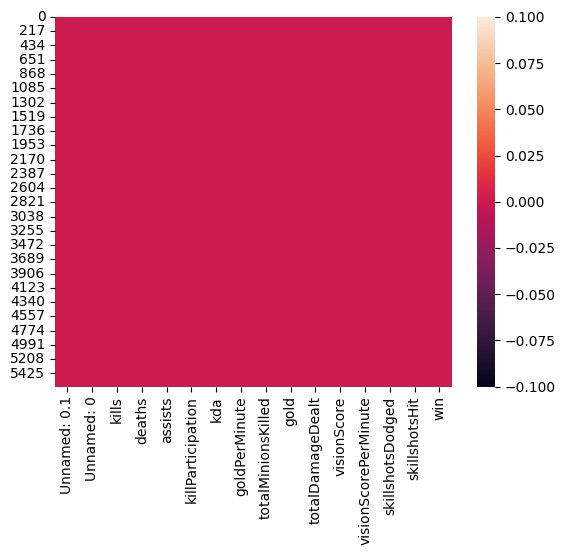

In [24]:
sns.heatmap(df.isnull())

In [25]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,kills,deaths,assists,killParticipation,kda,goldPerMinute,totalMinionsKilled,gold,totalDamageDealt,visionScore,visionScorePerMinute,skillshotsDodged,skillshotsHit
count,5624.000000,5624.000000,5624.00000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000,5624.000000
mean,2834.936700,2834.936700,6.11362,5.315434,8.372155,4.012126,4.012126,437.587685,117.033073,10025.545875,115077.407183,27.325925,1.032778,76.239687,38.705548
std,1647.448052,1647.448052,4.98096,3.280757,6.386453,4.243153,4.243153,135.162035,84.008546,3837.303314,72168.650081,21.890540,0.710580,84.844001,34.027895
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,153.672785,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1405.750000,1405.750000,2.00000,3.000000,4.000000,1.454545,1.454545,347.923972,32.000000,7550.000000,59662.500000,14.000000,0.606374,28.000000,19.000000
50%,2822.500000,2822.500000,5.00000,5.000000,7.000000,2.666667,2.666667,420.219786,127.000000,9775.000000,112121.000000,22.000000,0.890876,49.000000,30.000000
75%,4266.250000,4266.250000,9.00000,7.000000,11.000000,4.804545,4.804545,497.239415,187.000000,12450.000000,161738.750000,34.000000,1.233613,88.000000,47.000000
max,5701.000000,5701.000000,44.00000,22.000000,48.000000,41.000000,41.000000,2114.868366,424.000000,37650.000000,505341.000000,225.000000,4.996686,881.000000,409.000000


# Visualisasi Data

<Axes: >

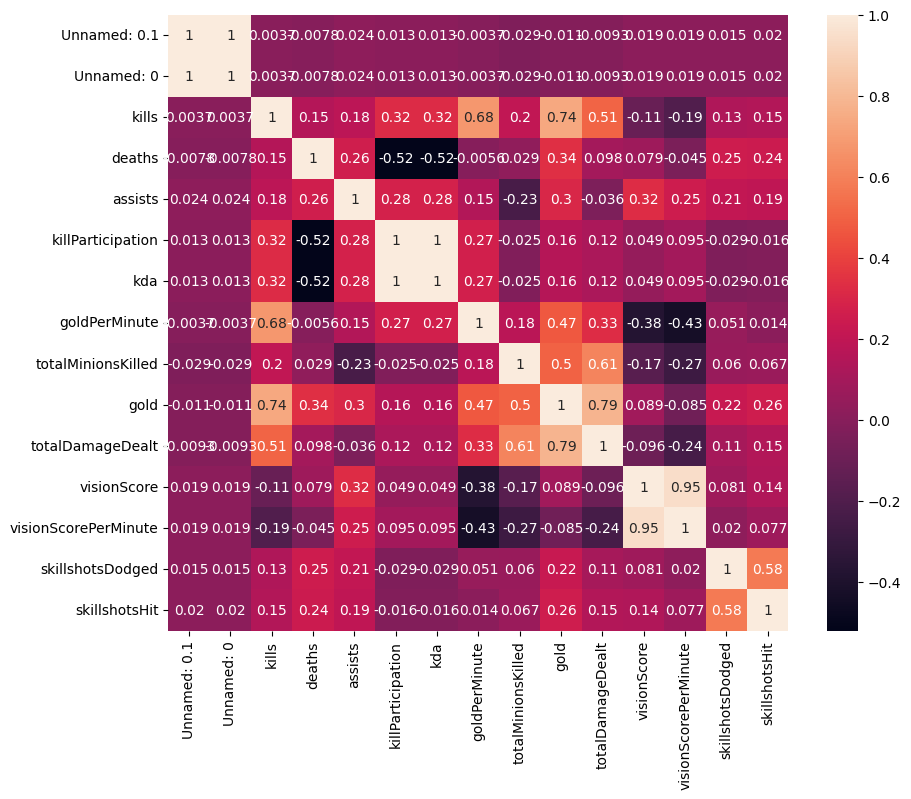

In [26]:
df=df.select_dtypes(include=[float,int])
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Terjual(Number of products) Berdasarkan Ketersediaan(Availability)

In [27]:
models = df.groupby('kills').count()[['deaths']].sort_values(by='deaths',ascending=True).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0'),
  Text(24, 0, '24.0'),
  Text(25, 0, '25.0'),
  Text(26, 0, '26.0'),
  Text(27, 0, '27.0'),
  Text(28, 0, '28.0'),
  Text(29, 0, '29.0'),
  Text(30, 0, '30.0'),
  Text(31, 0, '31.0'),
  Text(32, 0, '32.0'),
  Text(33, 0, '33.0'),
  Text(34, 0, '36.0'),
  Text(35, 0, '38.0'),
  Text(36, 0, '44.

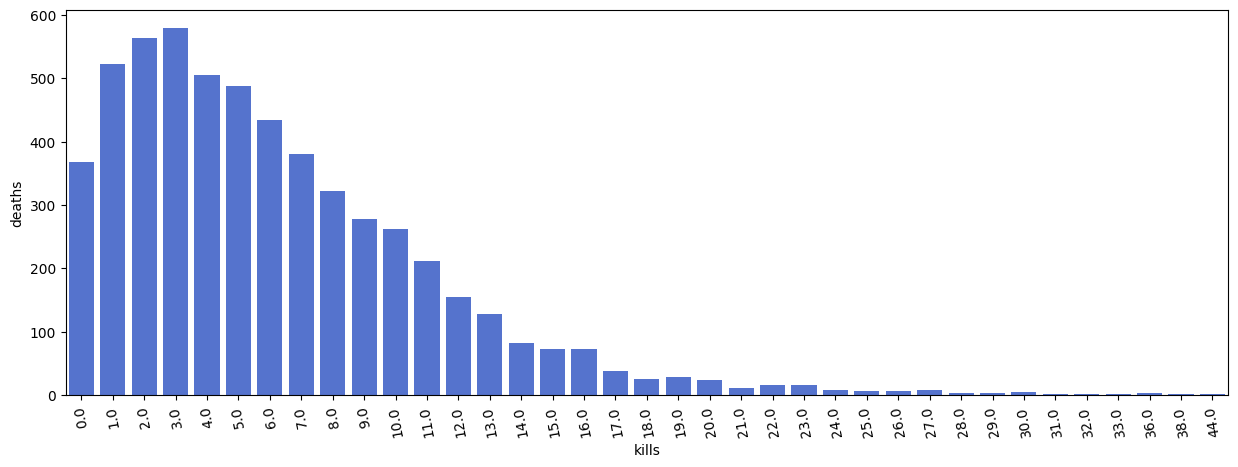

In [28]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['kills'], y=models['deaths'], color='royalblue')
plt.xticks(rotation=100)

# Jumlah memimpin(Lead times) berdasarkan Level stok(Stock levels)

In [29]:
engine = df.groupby('assists').count()[['killParticipation']].sort_values(by='killParticipation').reset_index()

<Axes: xlabel='assists', ylabel='killParticipation'>

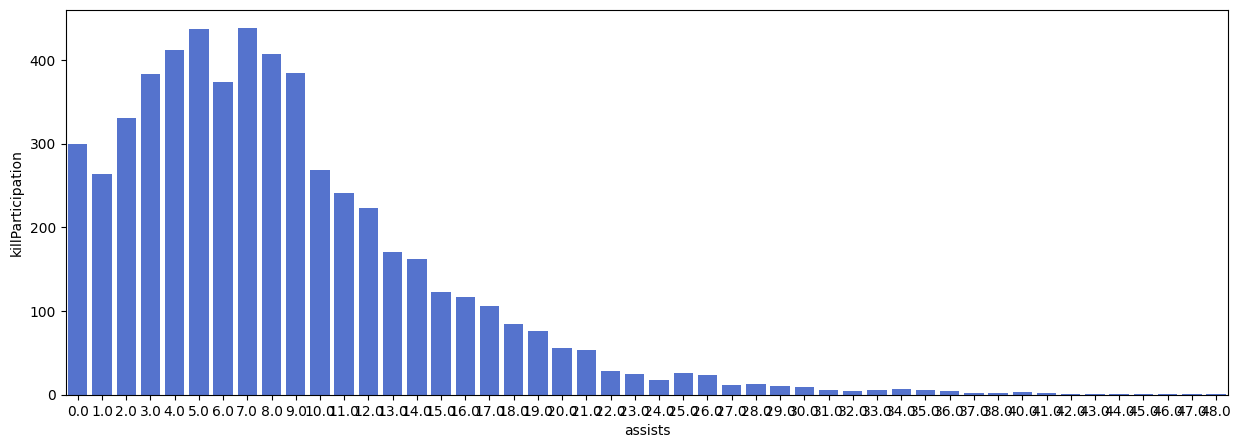

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(x=engine['assists'], y=engine['killParticipation'], color='royalblue')

# distribusi kill death assists

C:\Users\Atep8\AppData\Local\Temp\ipykernel_2036\664669005.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['kda'])


<Axes: xlabel='kda', ylabel='Density'>

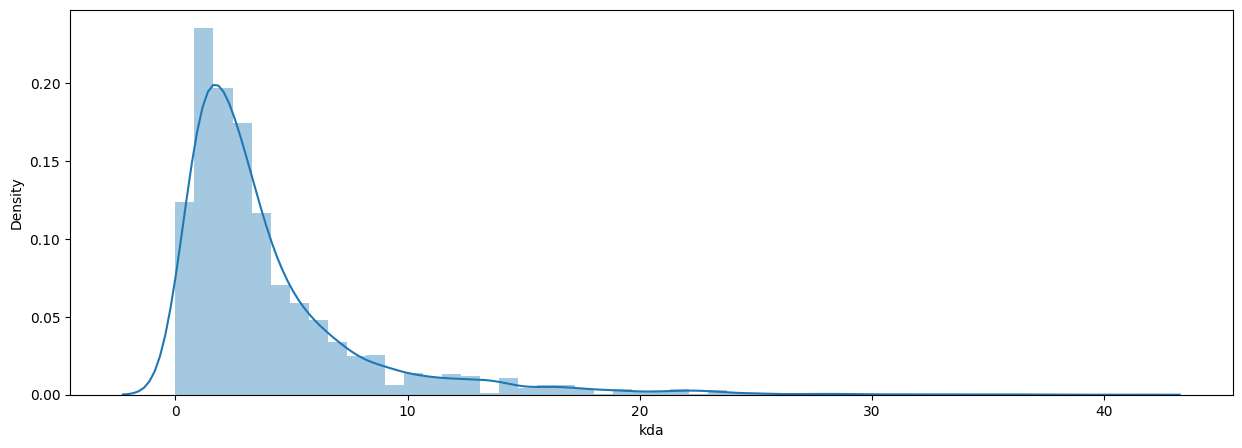

In [31]:
plt.figure(figsize=(15,5))
sns.distplot(df['kda'])

# seleksi fitur

In [32]:
features = ['kills','deaths','assists','killParticipation']
##Unnamed: 0.1	Unnamed: 0	kills	deaths	assists	killParticipation	kda	goldPerMinute	totalMinionsKilled	gold	totalDamageDealt	visionScore	visionScorePerMinute	skillshotsDodged	skillshotsHit
x = df[features]
y = df['kda']
x.shape, y.shape

((5624, 4), (5624,))

# split data training dan data testing

In [33]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1406,)

# membuat model regresi linier

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [35]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  1.0


# membuat inputan model regresi linier

In [36]:
input_data = np.array([[12,3,11,23]])

prediction = lr.predict(input_data)
print('Prediksi KDA :', prediction)

Prediksi KDA : [23.]


c:\Users\Atep8\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [37]:
import pickle

filename = 'estimasikda.sav'
pickle.dump(lr,open(filename,'wb'))